<a href="https://colab.research.google.com/github/Nailloon/Machine-Learning-Practice/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B%20%D0%AE%D0%B4%D0%B8%D0%BD%D1%86%D0%B5%D0%B2%D0%BE%D0%B9%20%D0%9D%D0%B0%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B/%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Понижение размерности для регрессии

In [ ]:
data_reg = pd.read_csv('/content/drive/MyDrive/cars3.csv')
data_reg.drop(['Unnamed: 0'], axis=1, inplace=True)
data_reg.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
0,190000,2010,0,2.5,0,10900.00,0,9,13,0,...,1,1,0,0,0,0,0,0,1,0
1,290000,2002,0,3.0,0,5000.00,1,12,54,0,...,1,1,0,0,0,0,0,0,1,0
2,402000,2001,0,2.5,0,2800.00,1,4,72,0,...,1,1,0,0,0,0,0,0,1,0
3,10000,1999,0,3.0,0,9999.00,1,9,42,1,...,1,1,0,0,0,0,0,0,1,0
4,280000,2001,0,2.5,0,2134.11,1,14,7,0,...,1,1,0,0,0,0,1,0,0,0


In [ ]:
X_reg = data_reg.drop(['price_usd'], axis=1)
y_reg = data_reg['price_usd']

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print(bag.score(X_test, y_test))

In [ ]:
np.random.seed(42)

In [ ]:
test(X_reg, y_reg)

0.8174307552081117


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)
X_scaled = pd.DataFrame(X_scaled, columns=X_reg.columns)

##Отбираем признаки с высокой дисперсией

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X_reg.describe()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,...,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,0.034959,2.055147,0.011653,0.352599,9.649062,16.306091,0.228543,0.607199,...,0.979030,0.139810,0.720096,0.140095,0.077626,0.078041,0.081493,0.064494,0.628844,0.069502
std,136072.376530,8.065731,0.183678,0.671091,0.107319,0.477785,6.093217,43.286933,0.419900,0.488379,...,0.143286,0.346794,0.448958,0.347090,0.267585,0.268240,0.273594,0.245633,0.483120,0.254310
min,0.000000,1942.000000,0.000000,0.200000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158000.000000,1998.000000,0.000000,1.600000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250000.000000,2003.000000,0.000000,2.000000,0.000000,0.000000,8.000000,5.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,325000.000000,2009.000000,0.000000,2.300000,0.000000,1.000000,12.000000,16.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1000000.000000,2019.000000,1.000000,8.000000,1.000000,1.000000,86.000000,1861.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X_reg)
print(X_vt.shape)
test(X_vt, y_reg)

(38531, 5)
0.5892820431580181


In [ ]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,odometer_value,year_produced,number_of_photos,up_counter,duration_listed
0,190000.0,2010.0,9.0,13.0,16.0
1,290000.0,2002.0,12.0,54.0,83.0
2,402000.0,2001.0,4.0,72.0,151.0
3,10000.0,1999.0,9.0,42.0,86.0
4,280000.0,2001.0,14.0,7.0,7.0


##Одномерный отбор признаков

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
skb = SelectKBest(k=150)
X_skb = skb.fit_transform(X_reg, y_reg)
test(X_skb, y_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


0.7994924392773688


In [ ]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,odometer_value,year_produced,engine_capacity,has_warranty,number_of_photos,feature_0,feature_1,feature_2,feature_3,feature_4,...,model_name_ZDX,model_name_i3,model_name_А22,model_name_Соболь,transmission_automatic,transmission_mechanical,body_type_suv,state_new,state_owned,drivetrain_all
0,190000.0,2010.0,2.5,0.0,9.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,290000.0,2002.0,3.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,402000.0,2001.0,2.5,0.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,10000.0,1999.0,3.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,280000.0,2001.0,2.5,0.0,14.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000.0,2000.0,3.5,0.0,5.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
38527,321000.0,2004.0,2.2,0.0,4.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38528,777957.0,2000.0,3.5,0.0,3.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
38529,20000.0,2001.0,2.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##Рекурсивный отбор признаков

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor().fit(X_reg, y_reg)

In [ ]:
rfe = RFE(estimator=tree, n_features_to_select=3, step=100).fit(X_reg, y_reg)
X_rfe = pd.DataFrame(rfe.transform(X_reg), columns=rfe.get_feature_names_out())
X_rfe

,year_produced,engine_capacity,drivetrain_front
0,2010.0,2.5,0.0
1,2002.0,3.0,0.0
2,2001.0,2.5,0.0
3,1999.0,3.0,0.0
4,2001.0,2.5,0.0
...,...,...,...
38526,2000.0,3.5,1.0
38527,2004.0,2.2,1.0
38528,2000.0,3.5,1.0
38529,2001.0,2.0,1.0


In [ ]:
test(X_rfe, y_reg)

0.8257744507248128


##Метод главных компонент

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_reg, y_reg)
X_pca.shape

(38531, 8)

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999996839375

In [ ]:
test(X_pca, y_reg)

0.8278013863612302


##Нелинейные методы выделения признаков

In [ ]:
from sklearn.manifold import TSNE, Isomap

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_reg[:100])

In [ ]:
test(X_tsne, y_reg[:100])

0.3930186728032582


In [ ]:
isomap = Isomap()
X_isomap = isomap.fit_transform(X_reg[:100])

In [ ]:
test(X_isomap, y_reg[:100])

0.4909249111686298


##Понижение размерности для классификации

In [ ]:
data_clf = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data_clf.drop(['Unnamed: 0'], axis=1, inplace=True)
data_clf.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
X = data_clf.drop(['Diabetes_012'], axis=1)
y = data_clf['Diabetes_012']

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [ ]:
np.random.seed(42)

In [ ]:
test(X, y)

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     32328
         1.0       0.41      0.21      0.27      5030

    accuracy                           0.85     37358
   macro avg       0.65      0.58      0.60     37358
weighted avg       0.82      0.85      0.83     37358



##Отбираем признаки с высокой дисперсией

In [ ]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,...,249049.000000,249049.000000,249049.000000,249049.00000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000
mean,0.425282,0.420463,0.962224,28.338813,0.442246,0.040261,0.093271,0.757995,0.634851,0.812210,...,0.951162,0.083337,2.502761,3.15976,4.202916,0.166192,0.440391,8.012572,5.055379,6.066943
std,0.494387,0.493634,0.190654,6.594030,0.496654,0.196571,0.290812,0.428298,0.481473,0.390545,...,0.215529,0.276392,1.067308,7.38012,8.681035,0.372254,0.496435,3.058090,0.983375,2.066245
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.00000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.00000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.162490,1.174022,0.198138,1.768450,1.123024,-0.204817,-0.320726,-1.769789,-1.318563,0.480842,...,0.226595,-0.301519,2.339759,2.010844,1.243758,2.239895,-0.887109,0.322891,-1.073223,-1.484310
1,-0.860223,-0.851773,-5.046984,-0.506340,1.123024,-0.204817,-0.320726,0.565039,-1.318563,-2.079684,...,-4.413157,3.316545,0.465883,-0.428146,-0.484150,-0.446449,-0.887109,-0.331113,0.960593,-2.452251
2,1.162490,1.174022,0.198138,-0.051382,-0.890453,-0.204817,-0.320726,-1.769789,0.758401,-2.079684,...,0.226595,3.316545,2.339759,3.636837,2.971666,2.239895,-0.887109,0.322891,-1.073223,0.935543
3,1.162490,-0.851773,0.198138,-0.203034,-0.890453,-0.204817,-0.320726,0.565039,0.758401,0.480842,...,0.226595,-0.301519,-0.471056,-0.428146,-0.484150,-0.446449,-0.887109,0.976895,-2.090130,-0.032398
4,1.162490,1.174022,0.198138,-0.657992,-0.890453,-0.204817,-0.320726,0.565039,0.758401,0.480842,...,0.226595,-0.301519,-0.471056,-0.021647,-0.484150,-0.446449,-0.887109,0.976895,-0.056315,-1.000340


In [ ]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
X_vt.shape

(249049, 9)

In [ ]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,Sex,Income
0,-0.204817,-0.320726,-1.769789,0.226595,-0.301519,2.010844,1.243758,-0.887109,-1.484310
1,-0.204817,-0.320726,0.565039,-4.413157,3.316545,-0.428146,-0.484150,-0.887109,-2.452251
2,-0.204817,-0.320726,-1.769789,0.226595,3.316545,3.636837,2.971666,-0.887109,0.935543
3,-0.204817,-0.320726,0.565039,0.226595,-0.301519,-0.428146,-0.484150,-0.887109,-0.032398
4,-0.204817,-0.320726,0.565039,0.226595,-0.301519,-0.021647,-0.484150,-0.887109,-1.000340


In [ ]:
test(X_vt, y)

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     32328
         1.0       0.32      0.07      0.12      5030

    accuracy                           0.85     37358
   macro avg       0.60      0.52      0.52     37358
weighted avg       0.80      0.85      0.81     37358



##Одномерный отбор признаков

In [ ]:
skb = SelectKBest(k=4)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     32328
         1.0       0.56      0.11      0.19      5030

    accuracy                           0.87     37358
   macro avg       0.72      0.55      0.56     37358
weighted avg       0.83      0.87      0.83     37358



In [ ]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,HighBP,BMI,GenHlth,DiffWalk
0,1.0,40.0,5.0,1.0
1,0.0,25.0,3.0,0.0
2,1.0,28.0,5.0,1.0
3,1.0,27.0,2.0,0.0
4,1.0,24.0,2.0,0.0
...,...,...,...,...
249044,1.0,45.0,3.0,0.0
249045,1.0,18.0,4.0,1.0
249046,0.0,28.0,1.0,0.0
249047,1.0,23.0,3.0,0.0


##Рекурсивный отбор признаков

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,HighBP,BMI,MentHlth,PhysHlth
0,1.0,40.0,18.0,15.0
1,0.0,25.0,0.0,0.0
2,1.0,28.0,30.0,30.0
3,1.0,27.0,0.0,0.0
4,1.0,24.0,3.0,0.0
...,...,...,...,...
249044,1.0,45.0,0.0,5.0
249045,1.0,18.0,0.0,0.0
249046,0.0,28.0,0.0,0.0
249047,1.0,23.0,0.0,0.0


In [ ]:
test(X_rfe, y)

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     32328
         1.0       0.41      0.09      0.15      5030

    accuracy                           0.86     37358
   macro avg       0.64      0.54      0.54     37358
weighted avg       0.81      0.86      0.82     37358



##Метод главных компонент

In [ ]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(249049, 4)

In [ ]:
sum(pca.explained_variance_ratio_)

0.9618862651982604

In [ ]:
test(X_pca, y)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     32328
         1.0       0.36      0.17      0.23      5030

    accuracy                           0.85     37358
   macro avg       0.62      0.56      0.57     37358
weighted avg       0.81      0.85      0.82     37358



##Нелинейные методы выделения признаков

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled[:3000])

In [ ]:
test(X_tsne, y[:3000])

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       360
         1.0       0.46      0.18      0.26        90

    accuracy                           0.79       450
   macro avg       0.64      0.56      0.57       450
weighted avg       0.75      0.79      0.76       450



In [ ]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:3000])

In [ ]:
test(X_isomap, y[:3000])

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86       360
         1.0       0.29      0.12      0.17        90

    accuracy                           0.76       450
   macro avg       0.55      0.52      0.52       450
weighted avg       0.70      0.76      0.72       450



##PCA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        cov = np.cov(X.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [ ]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

plt.scatter(X_projected[:,0], X_projected[:,1], c=y);
plt.show()

NameError: ignored

In [ ]:
test(X_projected, y)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     32328
         1.0       0.30      0.15      0.20      5030

    accuracy                           0.84     37358
   macro avg       0.59      0.55      0.56     37358
weighted avg       0.80      0.84      0.82     37358



##Задание 6

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []


    def fit_predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()
        # классификация выборки как индекс их кластеров
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # присваивание среднего значения кластеров центроидам
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def inertia(self):
        dis = []
        for i, index in enumerate(self.clusters):
            sample = self.X[index].T
            for j in range(0, len(sample[0])):
              dis.append(euclidean_distance((sample[0][j],sample[1][j]), self.centroids[i]))
        itog = [x ** 2 for x in dis]
        return sum(itog)

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

2


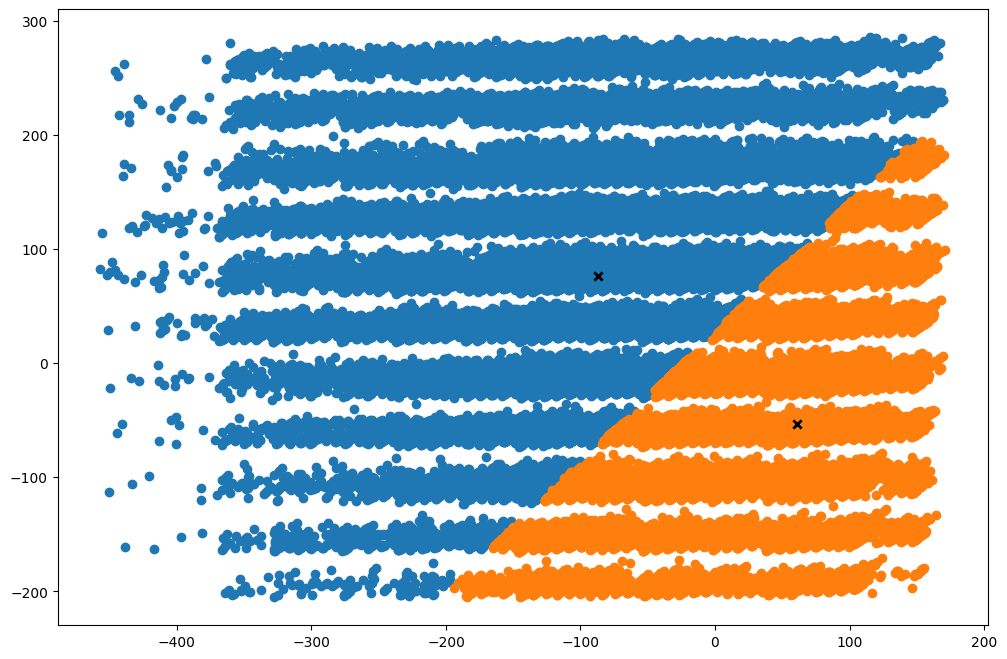

In [ ]:
clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=False)
k.fit_predict(X_projected)

k.plot()

##Задание 7

Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. Важно: модель должна быть реализована вами, не sklearn! Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.

In [ ]:
class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    def coef(self):
      s = []
      for wight in self.weights:
        s.append(wight)
      return s

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=1234)

In [ ]:
reg = LinearRegression(lr=0.000000000001)
reg.fit(X_train[:100],y_train[:100])
predictions = reg.predict(X_test)

In [ ]:
print(predictions)

[2467.41093698 8295.95411482 3864.99199824 ... 2087.46185517 4563.84842756
 5323.49316132]


In [ ]:
res = reg.coef()

In [ ]:
from heapq import nlargest

In [ ]:
reg = nlargest(5, res)

In [ ]:
print(reg)

[0.015192699399253187, 0.0030100956376856976, 0.00011710633441852662, 3.239438803521171e-05, 2.7373936133959793e-05]
